In [1]:
import pandas as pd    
import numpy as np    
import yfinance as yf    
import matplotlib.pyplot as plt    
import seaborn as sns    
import missingno as msno 

<h1>1.Data Prepration</h1>
(The stocks taken into consideration are: Trent, Varun Beverages, Hindustan Aeronautics, Brigade Enterprise and Zomato)

In [2]:
stocks = ["TRENT.NS", "VBL.NS", "HAL.NS", "BRIGADE.NS", "ZOMATO.NS"]  

In [3]:
data = yf.download(stocks, start="2024-03-01", end="2025-03-01") 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [2]:
data.info

NameError: name 'data' is not defined

In [5]:
df = data.stack(level=1).reset_index()  
df.columns = ["Date", "Stock", "Open", "High", "Low", "Close", "Volume"]  

In [6]:
print(df.isnull().values.any())

False


In [7]:
print(df.isnull().sum()) 

Date      0
Stock     0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


It is ensured that there is no missing values in the dataset

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.to_csv("stock_data_cleaned.csv", index=False)  

In [10]:
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

In [11]:
print(df.head())

                 Stock         Open         High          Low        Close  \
Date                                                                         
2024-03-01  BRIGADE.NS   993.688599  1010.412320   985.451542   999.429578   
2024-03-01      HAL.NS  3123.015869  3132.619617  3061.333709  3068.264283   
2024-03-01    TRENT.NS  3898.575195  3926.256155  3855.704706  3921.309597   
2024-03-01      VBL.NS   565.470825   569.618555   555.360654   569.538773   
2024-03-01   ZOMATO.NS   166.500000   173.500000   165.600006   168.000000   

              Volume  
Date                  
2024-03-01    129488  
2024-03-01   1516443  
2024-03-01    645099  
2024-03-01   5235115  
2024-03-01  42587331  


<h1>2.Exploratory Data Analysis</h1>

In [12]:
print(df.describe)

<bound method NDFrame.describe of                  Stock         Open         High          Low        Close  \
Date                                                                         
2024-03-01  BRIGADE.NS   993.688599  1010.412320   985.451542   999.429578   
2024-03-01      HAL.NS  3123.015869  3132.619617  3061.333709  3068.264283   
2024-03-01    TRENT.NS  3898.575195  3926.256155  3855.704706  3921.309597   
2024-03-01      VBL.NS   565.470825   569.618555   555.360654   569.538773   
2024-03-01   ZOMATO.NS   166.500000   173.500000   165.600006   168.000000   
...                ...          ...          ...          ...          ...   
2025-02-28  BRIGADE.NS   947.049988  1000.799988   932.200012   969.950012   
2025-02-28      HAL.NS  3088.199951  3224.800049  3080.000000  3202.000000   
2025-02-28    TRENT.NS  4851.549805  4876.399902  4715.000000  4760.000000   
2025-02-28      VBL.NS   436.049988   456.600006   429.649994   448.000000   
2025-02-28   ZOMATO.NS   222.1

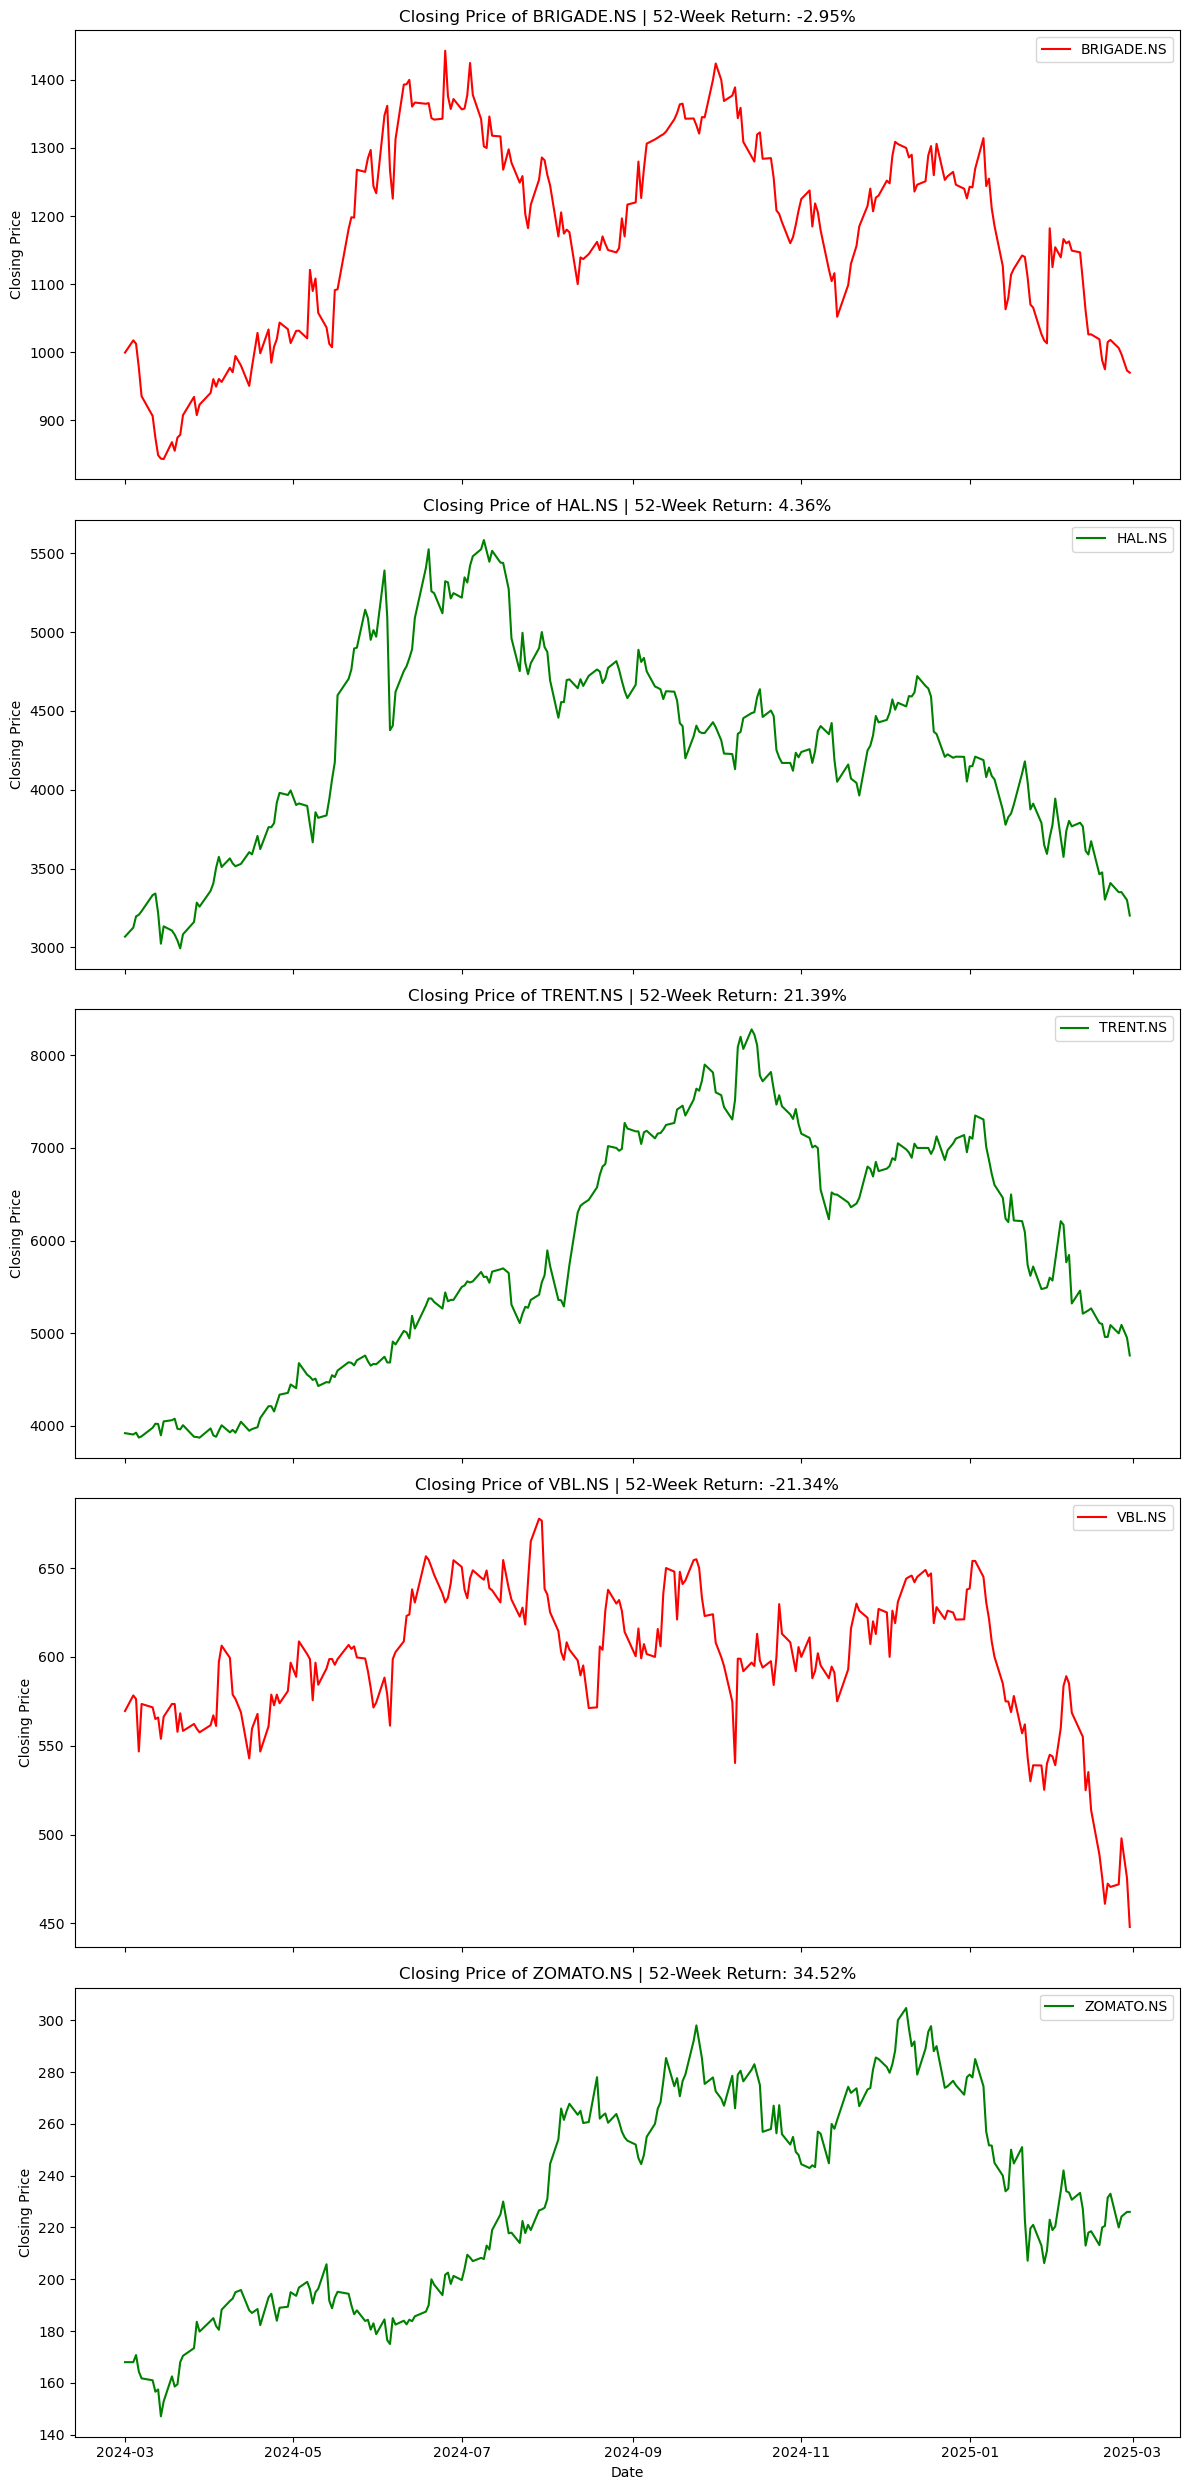

In [13]:
stocks = df["Stock"].unique()[:5]

fig, axes = plt.subplots(5, 1, figsize=(12, 25), sharex=True)

for i, stock in enumerate(stocks):
    subset = df[df["Stock"] == stock]
    
    one_year_ago = subset.index.max() - pd.DateOffset(weeks=52)
    past_price = subset.loc[subset.index.asof(one_year_ago), "Close"]
    current_price = subset["Close"].iloc[-1]
    
    return_52_week = ((current_price - past_price) / past_price) * 100
    line_color = "green" if return_52_week >= 0 else "red"

    axes[i].plot(subset.index, subset["Close"], label=stock, color=line_color)
    axes[i].set_title(f"Closing Price of {stock} | 52-Week Return: {return_52_week:.2f}%")
    axes[i].set_ylabel("Closing Price")
    axes[i].legend()

axes[-1].set_xlabel("Date")

plt.tight_layout()
plt.show()


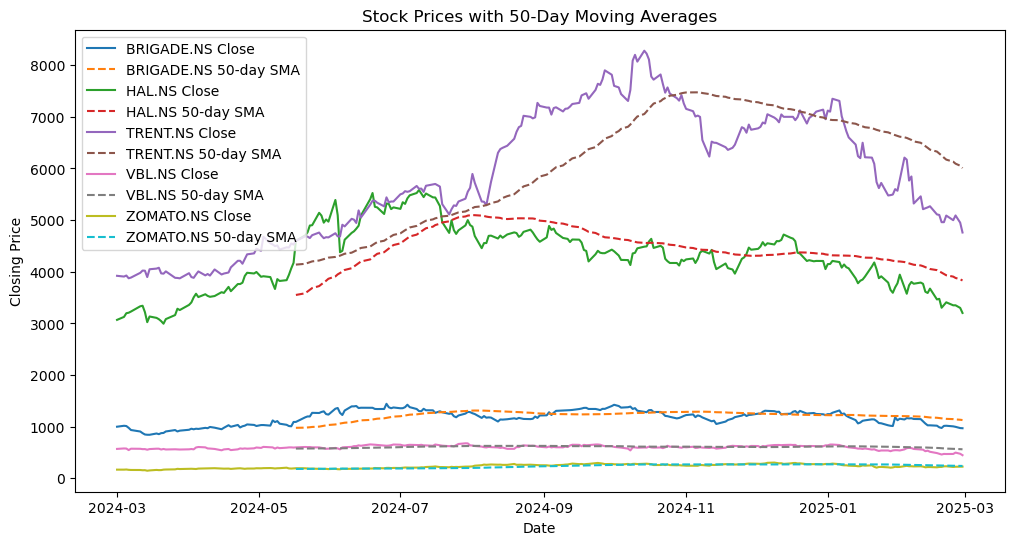

In [14]:
# Calculate the 50-day Simple Moving Average (SMA) for each stock
df["SMA_50"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=50).mean())

# Create a figure for visualization
plt.figure(figsize=(12,6))

# Loop through each stock to plot both its closing price and 50-day SMA
for stock in df["Stock"].unique():
    subset = df[df["Stock"] == stock]  
    
    # Plot the stock's closing price
    plt.plot(subset.index, subset["Close"], label=f"{stock} Close")
    
    # Plot the 50-day SMA as a dashed line
    plt.plot(subset.index, subset["SMA_50"], linestyle="dashed", label=f"{stock} 50-day SMA")

# Set the title and labels
plt.title("Stock Prices with 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Display the legend
plt.legend()

# Show the plot
plt.show()


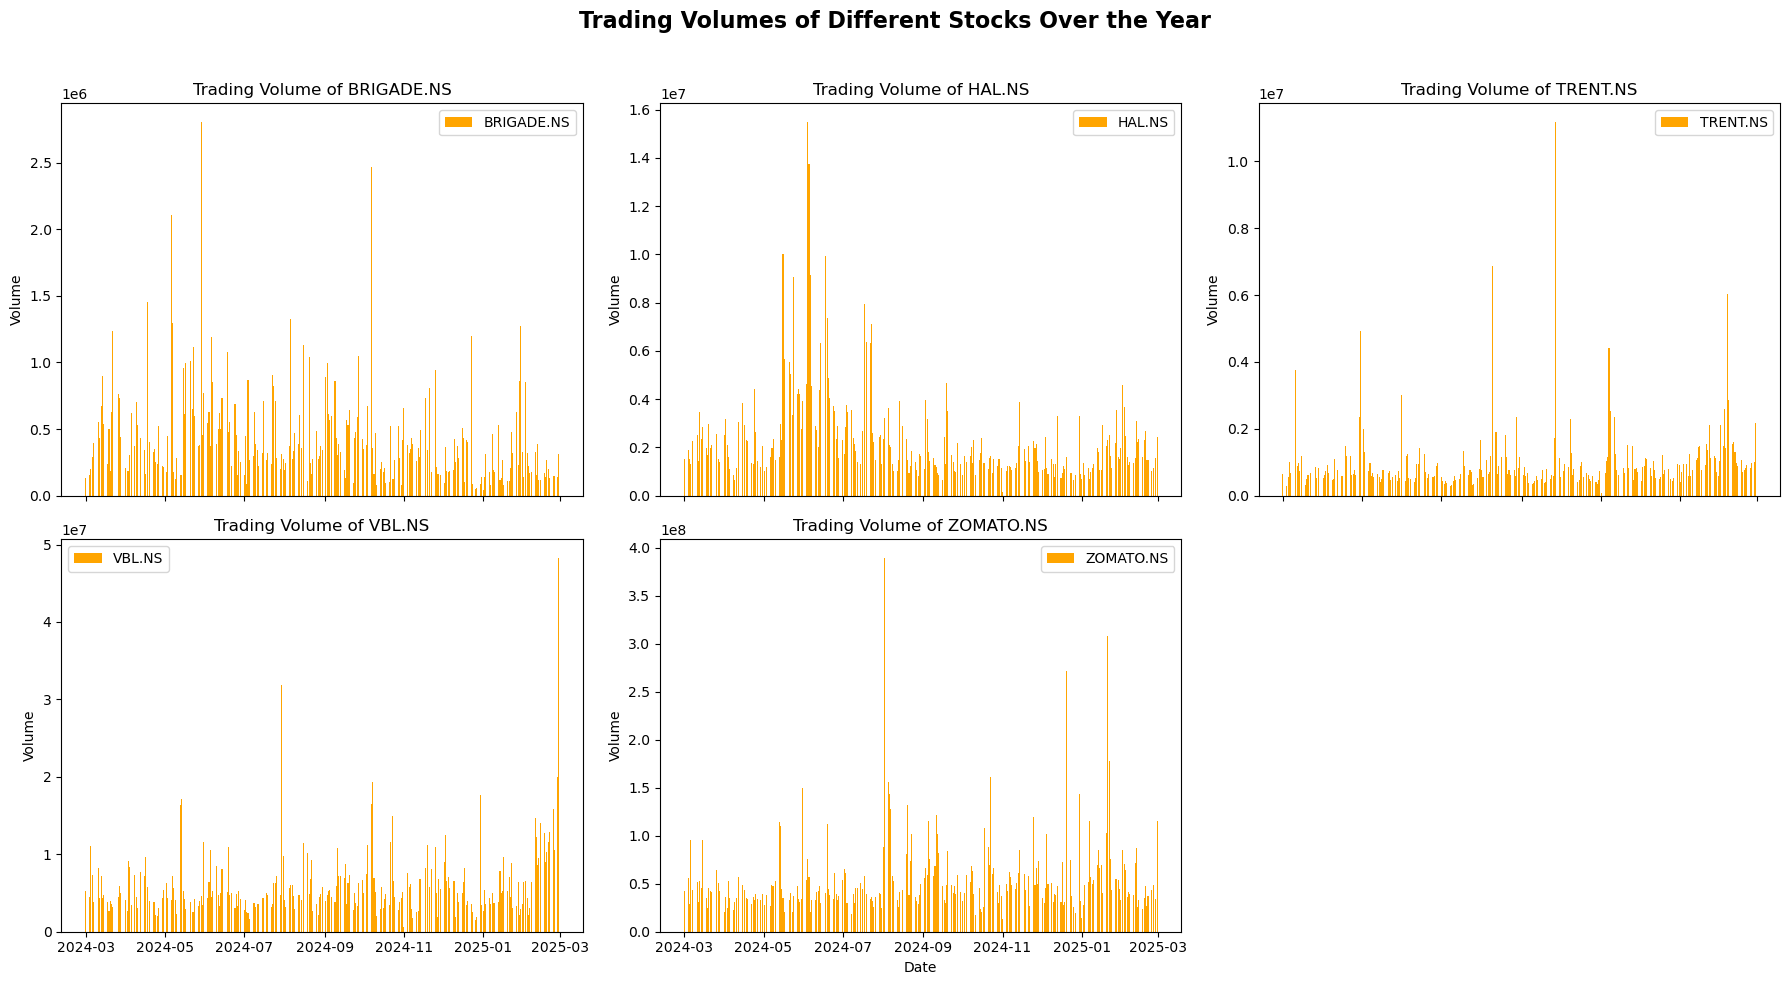

In [15]:
import matplotlib.pyplot as plt

stocks = df["Stock"].unique()[:5]

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

axes = axes.flatten()

for i, stock in enumerate(stocks):
    subset = df[df["Stock"] == stock]
    
    axes[i].bar(subset.index, subset["Volume"], label=stock, color="orange")
    axes[i].set_title(f"Trading Volume of {stock}")
    axes[i].set_ylabel("Volume")
    axes[i].legend()

fig.delaxes(axes[-1])

axes[-2].set_xlabel("Date")

# Add overall title
fig.suptitle("Trading Volumes of Different Stocks Over the Year", fontsize=16, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


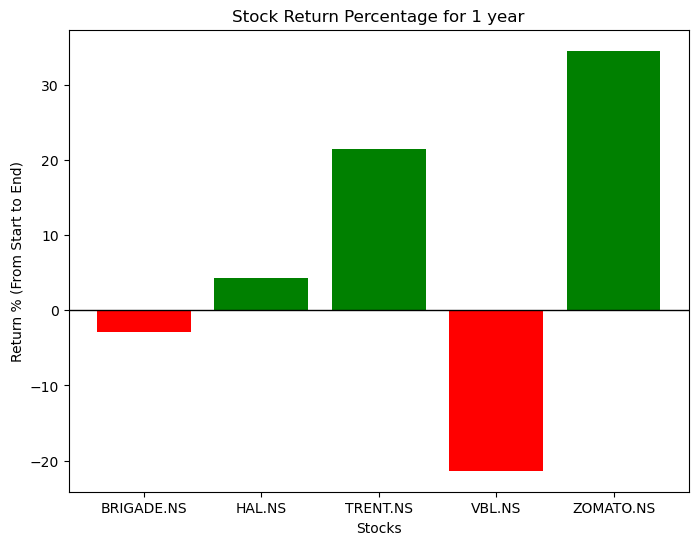

In [16]:
stocks = df["Stock"].unique()

plt.figure(figsize=(8, 6))

for stock in stocks:
    subset = df[df["Stock"] == stock]
    
    start_price = subset["Close"].iloc[0]
    end_price = subset["Close"].iloc[-1]
    
    return_pct = ((end_price - start_price) / start_price) * 100
    plt.bar(stock, return_pct, color="green" if return_pct >= 0 else "red")

plt.xlabel("Stocks")
plt.ylabel("Return % (From Start to End)")
plt.title("Stock Return Percentage for 1 year")
plt.axhline(0, color="black", linewidth=1)  # Reference line at 0%
plt.show()


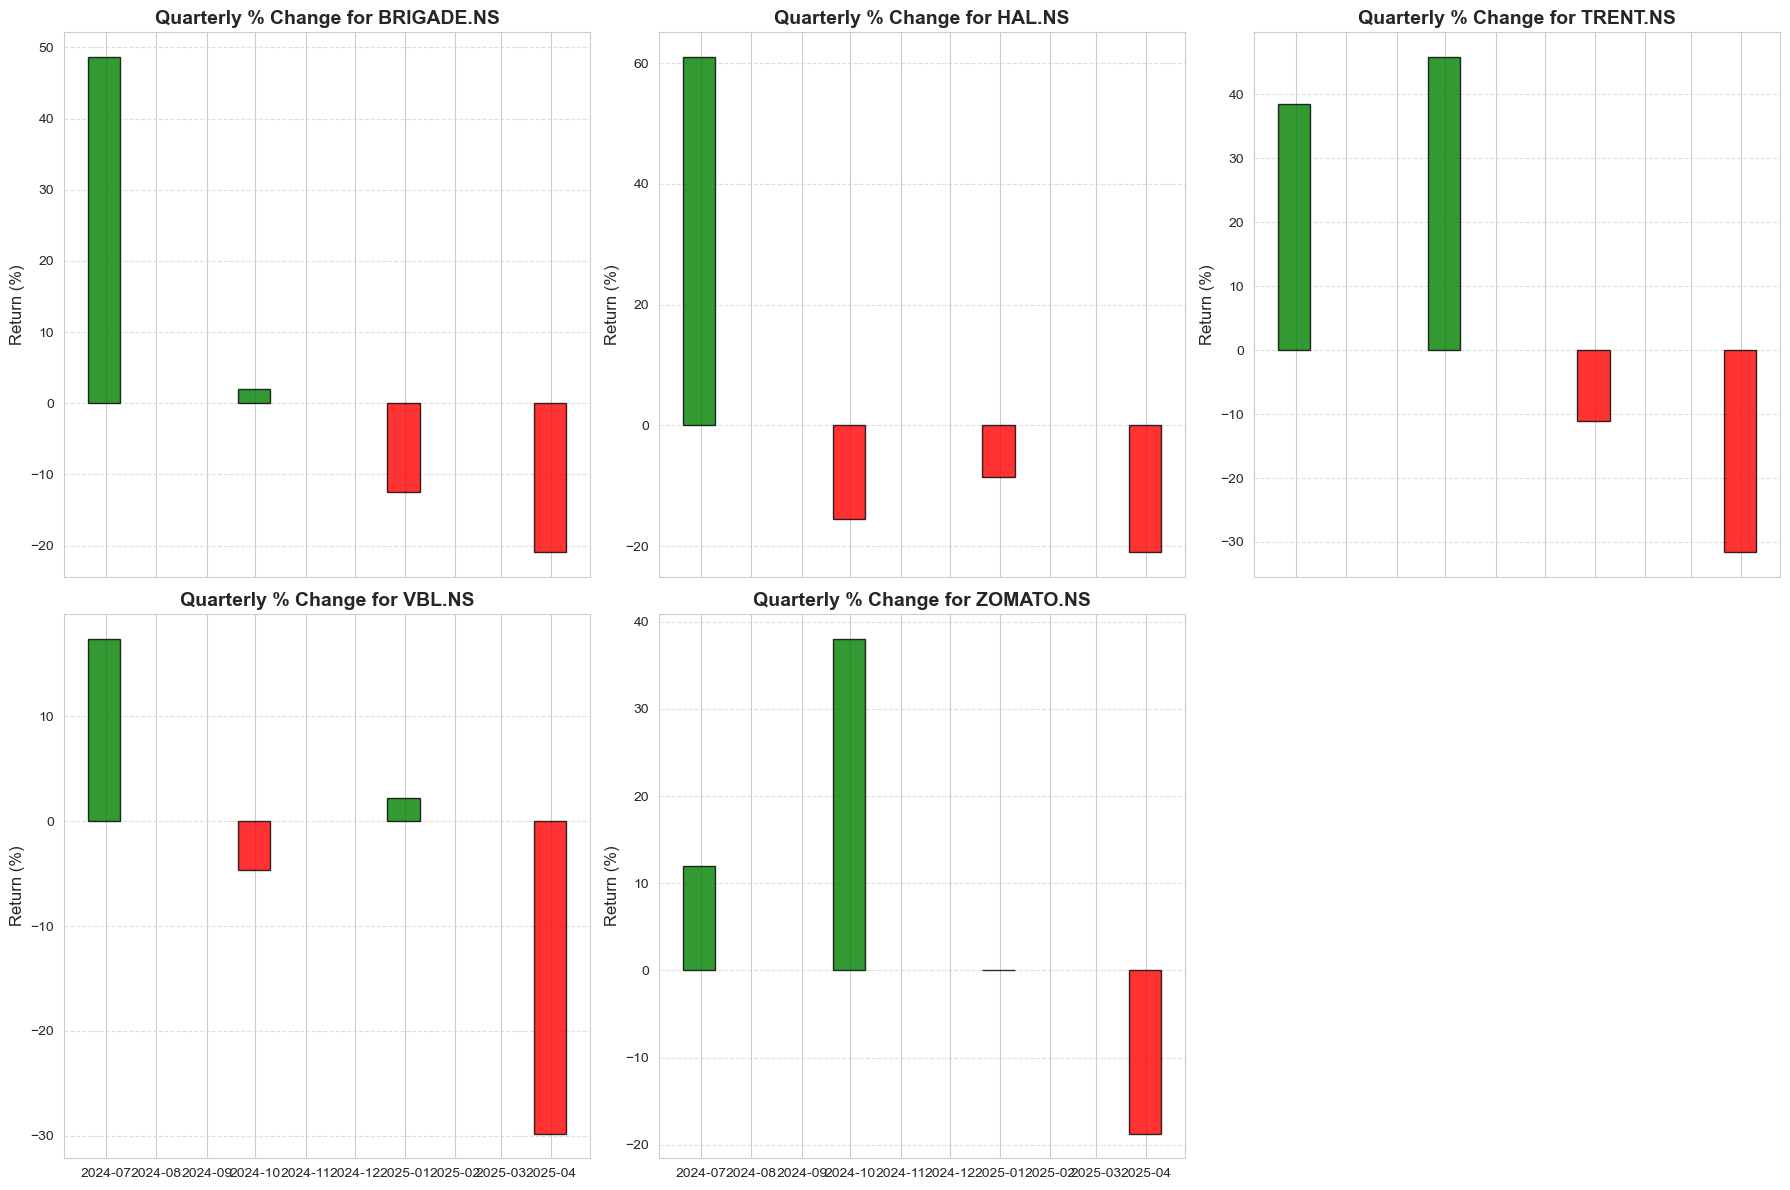

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

stocks = df["Stock"].unique()[:5]

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True)

axes = axes.flatten()

for i, stock in enumerate(stocks):
    subset = df[df["Stock"] == stock].copy()
    subset = subset.resample('3M').last()
    subset["Pct_Change"] = subset["Close"].pct_change() * 100  
    
    colors = ['green' if x >= 0 else 'red' for x in subset["Pct_Change"]]
    
    axes[i].bar(subset.index, subset["Pct_Change"], color=colors, width=20, edgecolor="black", alpha=0.8)
    
    axes[i].set_title(f"Quarterly % Change for {stock}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Return (%)", fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

axes[-1].set_xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
fig.delaxes(axes[-1])

plt.tight_layout()



<h1>3.Feature Engineering</h1>

<h5>Lagged Variables</h5>

In [18]:
df["Close_Lag_1"] = df.groupby("Stock")["Close"].shift(1)
df["Close_Lag_3"] = df.groupby("Stock")["Close"].shift(3)
df["Close_Lag_7"] = df.groupby("Stock")["Close"].shift(7)

<h5>Rolling Means</h5>

In [19]:
df["SMA_7"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=7).mean())
df["SMA_30"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=30).mean())


<h5>Daily Percentage Change</h5>

In [20]:
df["Daily_Pct_Change"] = ((df["Close"] - df["Open"]) / df["Open"]) * 100

In [21]:
df.head(5)

,Stock,Open,High,Low,Close,Volume,SMA_50,Close_Lag_1,Close_Lag_3,Close_Lag_7,SMA_7,SMA_30,Daily_Pct_Change
Date,,,,,,,,,,,,,
2024-03-01,BRIGADE.NS,993.688599,1010.412320,985.451542,999.429578,129488,NaN,NaN,NaN,NaN,NaN,NaN,0.577744
2024-03-01,HAL.NS,3123.015869,3132.619617,3061.333709,3068.264283,1516443,NaN,NaN,NaN,NaN,NaN,NaN,-1.753164
2024-03-01,TRENT.NS,3898.575195,3926.256155,3855.704706,3921.309597,645099,NaN,NaN,NaN,NaN,NaN,NaN,0.583146
2024-03-01,VBL.NS,565.470825,569.618555,555.360654,569.538773,5235115,NaN,NaN,NaN,NaN,NaN,NaN,0.719391
2024-03-01,ZOMATO.NS,166.500000,173.500000,165.600006,168.000000,42587331,NaN,NaN,NaN,NaN,NaN,NaN,0.900901


In [22]:
df.isnull().sum()

Stock                 0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
SMA_50              245
Close_Lag_1           5
Close_Lag_3          15
Close_Lag_7          35
SMA_7                30
SMA_30              145
Daily_Pct_Change      0
dtype: int64

In [25]:
df.to_csv("feature_engineered_dataset.csv")

<h6>Since the data now contains NaN values, we will be saving two different datasets. One with the work done till now as Feature_Engineered_Dataset and the other one with Cleaned value dataset for further modelling calculations.</h6>

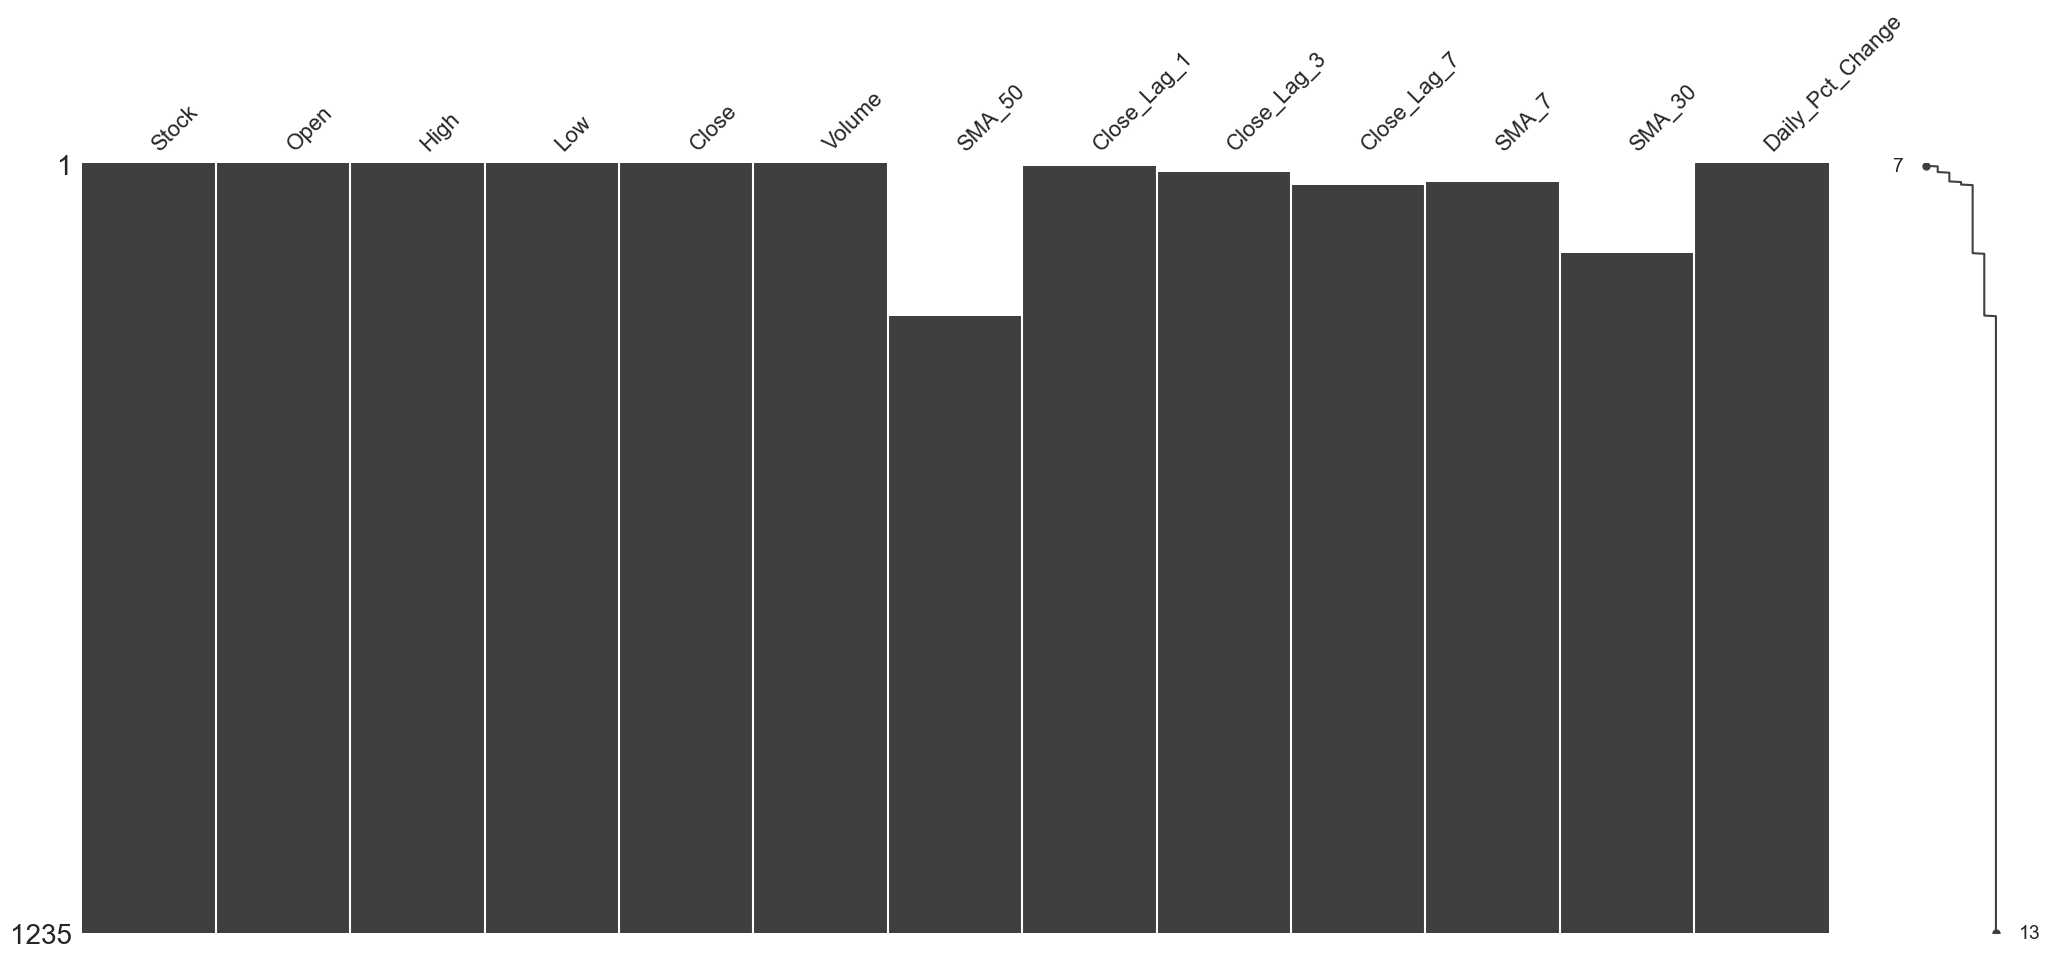

In [26]:
msno.matrix(df)  
plt.show()

In [27]:
df["Close_Lag_1"] = df.groupby("Stock")["Close_Lag_1"].transform(lambda x: x.ffill().bfill())
df["Close_Lag_3"] = df.groupby("Stock")["Close_Lag_3"].transform(lambda x: x.ffill().bfill())
df["Close_Lag_7"] = df.groupby("Stock")["Close_Lag_7"].transform(lambda x: x.ffill().bfill())

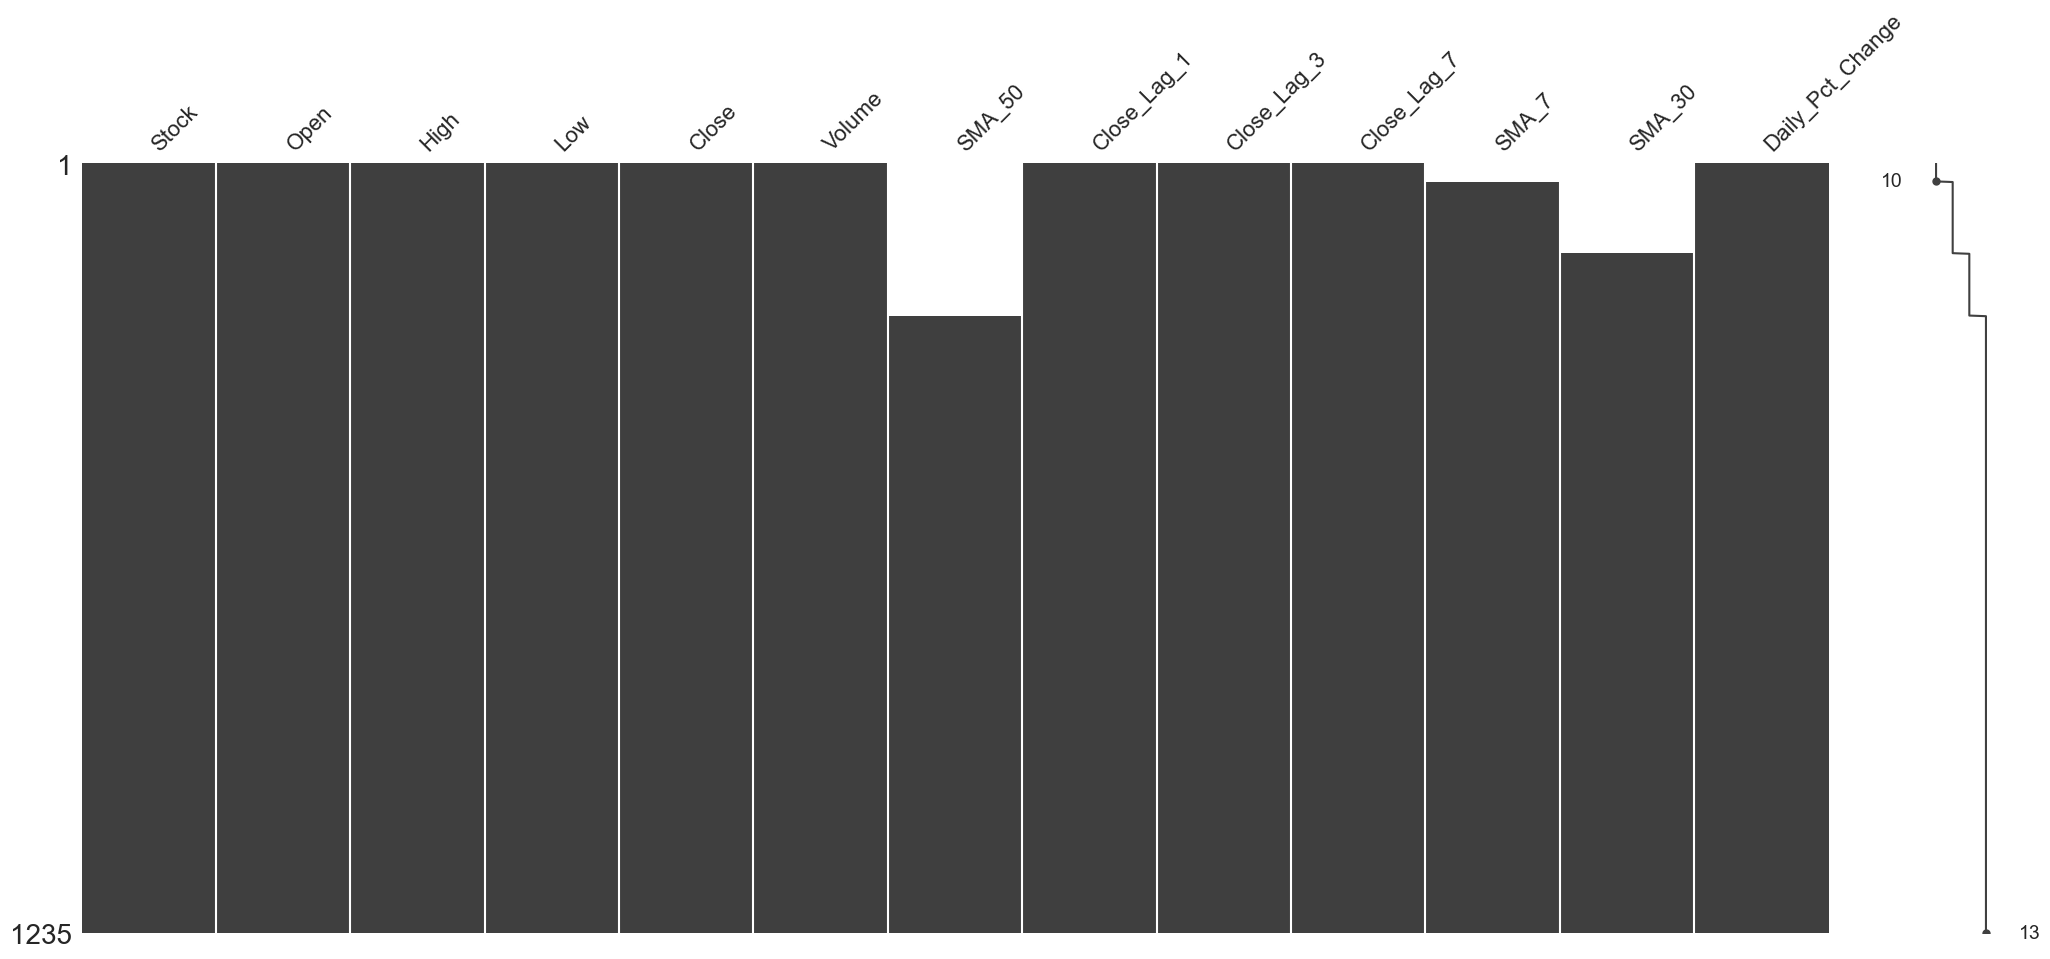

In [28]:
msno.matrix(df)  
plt.show()

In [29]:
df["SMA_7"] = df.groupby("Stock")["SMA_7"].transform(lambda x: x.fillna(x.mean()))
df["SMA_30"] = df.groupby("Stock")["SMA_30"].transform(lambda x: x.fillna(x.mean()))
df["SMA_50"] = df.groupby("Stock")["SMA_50"].transform(lambda x: x.fillna(x.mean()))

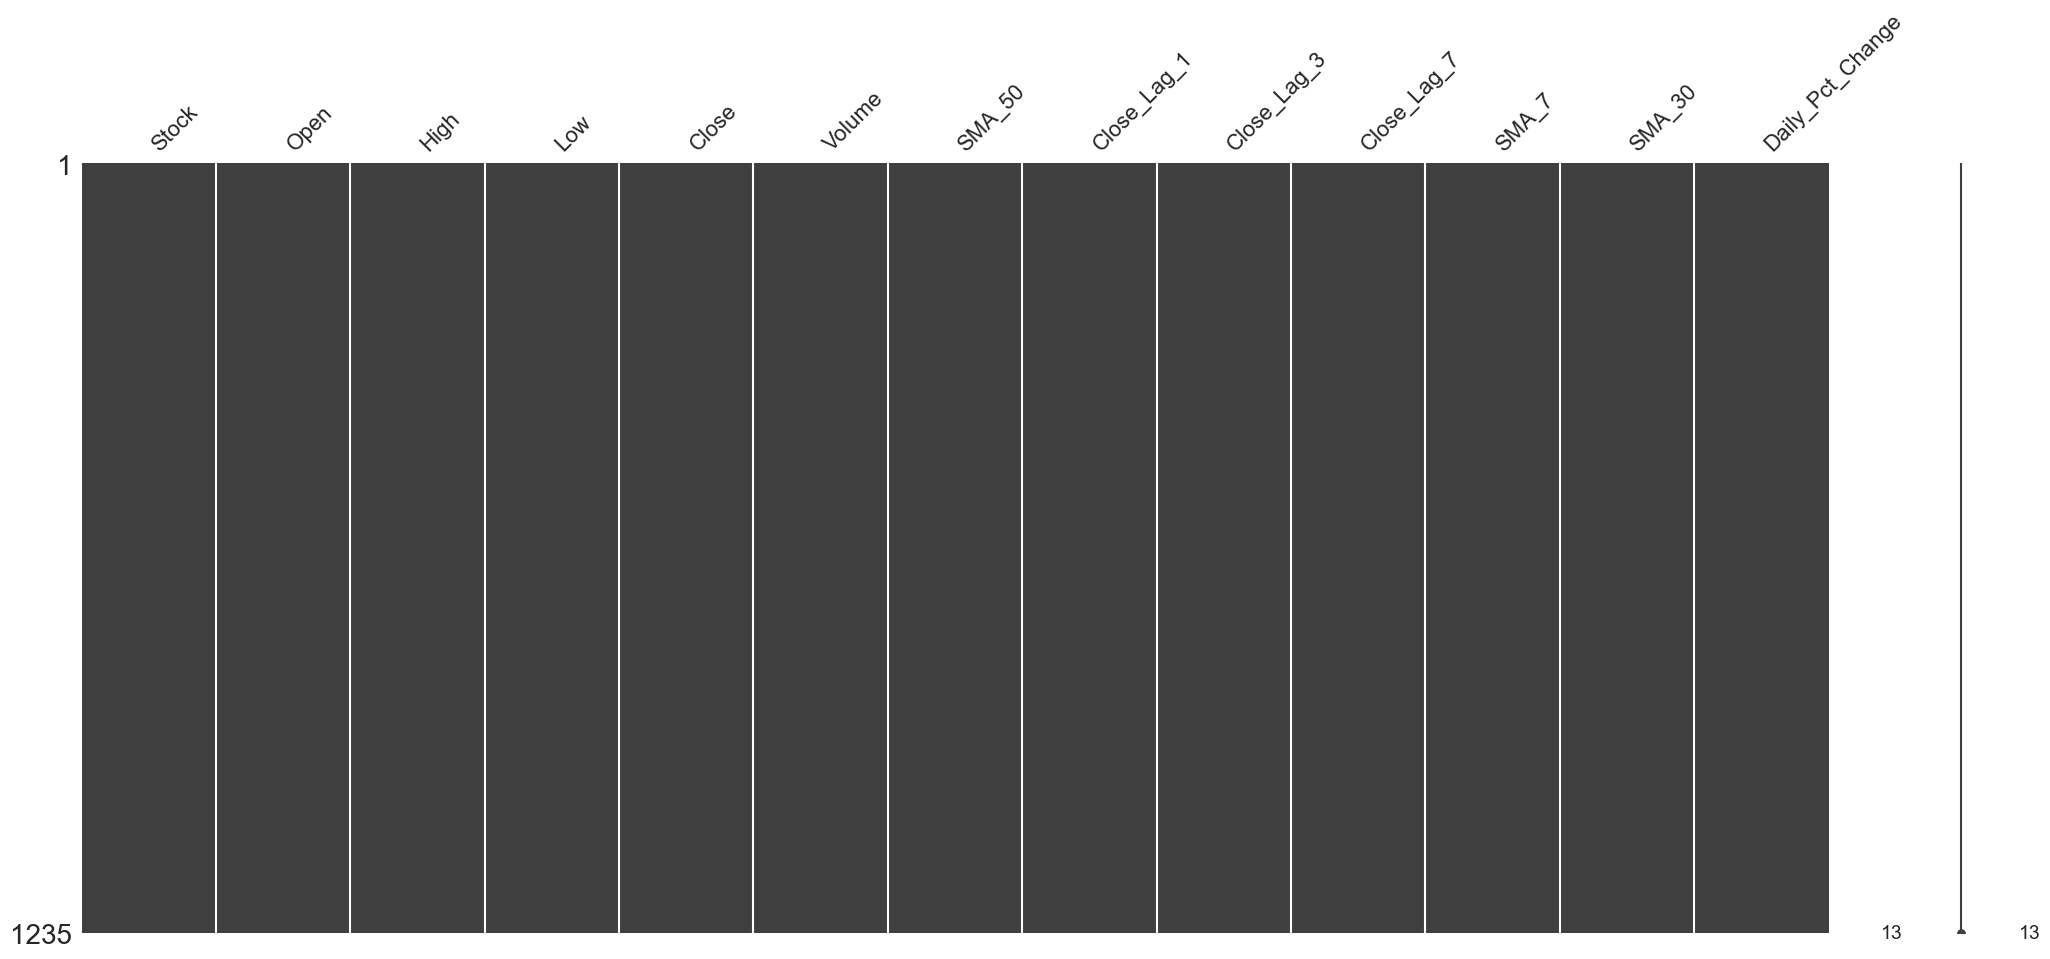

In [30]:
msno.matrix(df)  
plt.show()

In [31]:
df.head()

,Stock,Open,High,Low,Close,Volume,SMA_50,Close_Lag_1,Close_Lag_3,Close_Lag_7,SMA_7,SMA_30,Daily_Pct_Change
Date,,,,,,,,,,,,,
2024-03-01,BRIGADE.NS,993.688599,1010.412320,985.451542,999.429578,129488,1222.454394,999.429578,999.429578,999.429578,1185.634507,1206.790531,0.577744
2024-03-01,HAL.NS,3123.015869,3132.619617,3061.333709,3068.264283,1516443,4472.838705,3068.264283,3068.264283,3068.264283,4308.547651,4403.513072,-1.753164
2024-03-01,TRENT.NS,3898.575195,3926.256155,3855.704706,3921.309597,645099,6135.819924,3921.309597,3921.309597,3921.309597,5905.422104,6037.768073,0.583146
2024-03-01,VBL.NS,565.470825,569.618555,555.360654,569.538773,5235115,609.646495,569.538773,569.538773,569.538773,600.055552,605.983127,0.719391
2024-03-01,ZOMATO.NS,166.500000,173.500000,165.600006,168.000000,42587331,238.877973,168.000000,168.000000,168.000000,232.335975,236.214532,0.900901


In [32]:
df.isnull().sum()

Stock               0
Open                0
High                0
Low                 0
Close               0
Volume              0
SMA_50              0
Close_Lag_1         0
Close_Lag_3         0
Close_Lag_7         0
SMA_7               0
SMA_30              0
Daily_Pct_Change    0
dtype: int64

In [33]:
df.to_csv("cleaned_feature_engineered_dataset.csv")